In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook', style='dark', font_scale=1.5)

PROJ_ROOT = os.path.join(os.pardir)

In [2]:
data_path = os.path.join(PROJ_ROOT, 
                         'data',
                        'processed',
                         'merged_df_air_no2.csv')


all_data=pd.read_csv(data_path, parse_dates=['new_date'])
print(all_data.shape)

(66892, 60)


In [3]:

all_data.head(3)

,Unnamed: 0,new_date,latitude,longitude,sampledepth,huc12_,hucname_,areaacres,za_mean,lc_0,...,p10_lat,p10_long,distance10,no_lat,no_long,date_local,arithmetic_mean,first_max_value,correlated,geometry
0,0,2019-03-24 12:28:00,38.6336,-75.6177,0.5,20801090405,Butler Mill Branch-Nanticoke River,27423.32,67.259003,0.0,...,39.310833,-76.474444,65.655946,39.310833,-76.474444,2019-03-24,16.091667,38.2,not correlated,POINT (-75.6177 38.6336)
1,1,2019-03-24 12:46:00,38.6422,-75.6068,0.3,20801090404,Clear Brook-Turkey Branch,24031.76,67.646972,0.0,...,39.310833,-76.474444,65.649571,39.310833,-76.474444,2019-03-24,16.091667,38.2,not correlated,POINT (-75.60680000000001 38.6422)
2,2,2019-03-24 13:05:00,38.6013,-75.6563,0.5,20801090405,Butler Mill Branch-Nanticoke River,27423.32,67.259003,0.0,...,39.310833,-76.474444,65.857832,39.310833,-76.474444,2019-03-24,16.091667,38.2,not correlated,POINT (-75.6563 38.6013)


In [4]:
all_data['day'] = all_data['new_date'].dt.day

In [5]:
#which sample locations have the most / middle / least values in the data set
all_data.groupby(['latitude','longitude'])['tn'].count().sort_values(ascending=False)[:5]

latitude  longitude
39.45037  -77.73165    438
38.81430  -76.75087    409
39.34279  -76.72639    379
39.49364  -79.04470    374
39.62348  -76.16477    373
Name: tn, dtype: int64

In [6]:
all_data[(all_data.longitude==-77.73165) & (all_data.latitude==39.45037)].corr().abs().loc['tn'].sort_values(ascending=False)

tn                 1.000000e+00
Unnamed: 0         2.514284e-01
year               2.155972e-01
dayofweek          1.790054e-01
humidity_narr      1.383288e-01
first_max_value    1.298134e-01
precip48_narr      1.201898e-01
precip24_narr      1.152655e-01
arithmetic_mean    1.051046e-01
hour               9.729009e-02
sampledepth        9.715868e-02
precip3_narr       8.804976e-02
sfc_runoff         7.984548e-02
cl_cover_narr      7.145408e-02
quarter            5.691402e-02
month              5.510921e-02
week               5.094539e-02
no_long            4.647323e-02
p10_long           4.647323e-02
distance10         4.647323e-02
no_lat             4.647323e-02
p10_lat            4.647323e-02
u_wind_narr        3.692829e-02
wdirection_narr    3.692829e-02
min                3.431842e-02
sfc_air_narr       2.943297e-02
v_wind_narr        1.545361e-02
day                1.459818e-02
airtemp_narr       9.935976e-03
windspeed_narr     7.269191e-03
lc_81              2.587483e-15
za_mean 

In [7]:
all_data[(all_data.longitude==-77.73165) & (all_data.latitude==39.45037)].apply(lambda x: x.factorize()[0]).corr().abs().loc['tn'].sort_values(ascending=False)[:25]

tn                 1.000000
humidity_narr      0.913070
Unnamed: 0         0.912340
new_date           0.912340
wdirection_narr    0.911902
airtemp_narr       0.911902
v_wind_narr        0.911902
windspeed_narr     0.911902
u_wind_narr        0.911902
date               0.910890
date_local         0.910890
sfc_air_narr       0.907480
arithmetic_mean    0.856112
precip48_narr      0.789445
year               0.744154
first_max_value    0.709769
precip24_narr      0.648528
sampledepth        0.327282
min                0.266289
precip3_narr       0.251308
n_bins             0.229872
week               0.220179
dayofweek          0.204255
cl_cover_narr      0.202458
day                0.200545
Name: tn, dtype: float64

The data is more correlated after factorizing the data. More data may be needed to fully capture the influence of total nitrogen in the bay.

The new value of arithmetic mean has a high correlation within one sample site. Does this change when calculated with lower samples at the same site? When readings are aggregated by day, instead of by hour. Or when aggregated by an HUC area?

Median Count value of Sampmles is 59

In [8]:
a_length=len(all_data.groupby(['latitude','longitude'])['tn'].count().sort_values(ascending=False))
all_data.groupby(['latitude','longitude'])['tn'].count().sort_values(ascending=False).reset_index().iloc[a_length//2]

latitude     39.71850
longitude   -78.77097
tn           59.00000
Name: 365, dtype: float64

In [9]:
all_data[(all_data.longitude==-78.77096999999998) & (all_data.latitude==39.71850)].apply(lambda x: x.factorize()[0]).corr().abs().loc['tn'].sort_values(ascending=False)[:25]

u_wind_narr        1.000000
wdirection_narr    1.000000
new_date           1.000000
tn                 1.000000
airtemp_narr       1.000000
humidity_narr      1.000000
sfc_air_narr       1.000000
v_wind_narr        1.000000
windspeed_narr     1.000000
Unnamed: 0         1.000000
date               1.000000
date_local         1.000000
arithmetic_mean    0.990715
precip48_narr      0.921918
precip24_narr      0.834239
cl_cover_narr      0.715671
first_max_value    0.713455
week               0.536233
precip3_narr       0.532365
min                0.463285
day                0.351953
sampledepth        0.221893
quan_10            0.184908
hour               0.175625
year               0.139747
Name: tn, dtype: float64

The minimum of 5 observation is used, however more would be needed to have a more meaningful correlation value.

In [10]:
all_data.groupby(['latitude','longitude'])['tn'].count().sort_values(ascending=False)[-80:-73]

latitude  longitude
38.27267  -76.51200    5
38.22066  -76.48967    5
42.19350  -76.20580    5
38.25217  -76.53267    5
38.23067  -76.46500    5
38.23672  -76.50090    5
38.24166  -76.50350    5
Name: tn, dtype: int64

In [11]:
all_data[(all_data.longitude==-76.51200) & (all_data.latitude==38.27267)].apply(lambda x: x.factorize()[0]).corr().abs().loc['tn'].sort_values(ascending=False)[:28]

tn                 1.000000
wdirection_narr    0.970725
humidity_narr      0.970725
first_max_value    0.970725
sfc_air_narr       0.970725
u_wind_narr        0.970725
v_wind_narr        0.970725
windspeed_narr     0.970725
Unnamed: 0         0.970725
airtemp_narr       0.970725
precip48_narr      0.970725
min                0.970725
new_date           0.970725
date               0.970725
date_local         0.970725
arithmetic_mean    0.970725
precip24_narr      0.970725
day                0.941742
quan_10            0.931552
n_bins             0.784465
cl_cover_narr      0.784465
precip3_narr       0.730769
year               0.686406
hour               0.196116
quarter            0.100901
dayofweek          0.100901
week               0.100901
month              0.100901
Name: tn, dtype: float64

In [12]:
print(all_data.groupby(['huc12_'])['tn'].count().sort_values(ascending=False)[:3])
print(all_data.groupby(['huc12_'])['tn'].count().sort_values(ascending=False)[len(all_data.huc12_.unique())//2:len(all_data.huc12_.unique())//2+2])
print(all_data.groupby(['huc12_'])['tn'].count().sort_values(ascending=False)[-20:-18])

huc12_
20600010000    4174
20801010000    3705
20600020409    1011
Name: tn, dtype: int64
huc12_
20600020405    161
20700100201    158
Name: tn, dtype: int64
huc12_
20501030408    7
20501030303    7
Name: tn, dtype: int64


In [13]:
gpd_df=all_data.groupby(['huc12_','year','day'], as_index=False).mean()
print(gpd_df[gpd_df.huc12_==20600010000].apply(lambda x: x.factorize()[0]).corr().abs().loc['tn'].sort_values(ascending=False)[:28])
print(gpd_df[gpd_df.huc12_==20600010000].corr().abs().loc['tn'].sort_values(ascending=False)[:28])

v_wind_narr        1.000000
tn                 1.000000
airtemp_narr       1.000000
humidity_narr      1.000000
sfc_air_narr       1.000000
u_wind_narr        1.000000
wdirection_narr    1.000000
windspeed_narr     1.000000
Unnamed: 0         0.999984
arithmetic_mean    0.999950
year               0.997646
precip48_narr      0.971333
first_max_value    0.944661
distance10         0.933110
precip24_narr      0.904137
min                0.798974
sampledepth        0.770315
no_long            0.755932
p10_long           0.755932
p10_lat            0.745230
no_lat             0.745230
cl_cover_narr      0.680340
week               0.669081
precip3_narr       0.633970
latitude           0.619201
longitude          0.603702
of_dist            0.589967
month              0.453578
Name: tn, dtype: float64
tn                 1.000000
latitude           0.622162
of_dist            0.618264
sfc_runoff         0.609654
no_long            0.514997
p10_long           0.514997
distance10         0.51

Arithmetic means seems to drop in correlation - which makes sense, not all air NO2 pollution will affect total nitrogen the same in all areas of the HUC12 code.

In [14]:
gpd_df=all_data.groupby(['huc12_','year','day'], as_index=False).mean()
print(gpd_df[gpd_df.huc12_==20501030408].apply(lambda x: x.factorize()[0]).corr().abs().loc['tn'].sort_values(ascending=False)[:28])
print(gpd_df[gpd_df.huc12_==20501030408].corr().abs().loc['tn'].sort_values(ascending=False)[:28])

first_max_value    1.000000e+00
u_wind_narr        1.000000e+00
Unnamed: 0         1.000000e+00
tn                 1.000000e+00
airtemp_narr       1.000000e+00
arithmetic_mean    1.000000e+00
sfc_air_narr       1.000000e+00
humidity_narr      1.000000e+00
v_wind_narr        1.000000e+00
windspeed_narr     1.000000e+00
wdirection_narr    1.000000e+00
precip24_narr      1.000000e+00
precip48_narr      1.000000e+00
year               9.701425e-01
week               8.574929e-01
month              8.183171e-01
day                5.103104e-01
quarter            4.082483e-01
cl_cover_narr      2.540003e-01
dayofweek          2.080126e-01
precip3_narr       4.234224e-17
sfc_runoff         1.133117e-17
huc12_                      NaN
latitude                    NaN
longitude                   NaN
sampledepth                 NaN
areaacres                   NaN
za_mean                     NaN
Name: tn, dtype: float64
tn                 1.000000e+00
precip24_narr      9.135475e-01
precip48_narr  

The new NO2 variable is more correlated when looking at the sample level data vs looking at the HUC12 level. This could be due to how NO2 travels from point sources and weather conditions. Not all of one HUC12 area will be affected the same way. Though it seems the weather data seems to stay consistent among HUC12 and sampel site locations. This could be due to more nearby monitoring stations and/or that weather play a large role in how air pollutants make it into the bay.

More land cover data is needed to make any meaningful correlations. Looking at only one sample site - the land cover data does not change (data is only from 2016). To determine land cover relationship to total nitrogen:
- Total nitrogen should be aggregated by year (2016) and by HUC12 code, but similar to the new NO2 data, different make up of land cover may affect total nitrogen differently. There is high variability of total nitrogen readings within and between HUC12 segements.
- Gather more land cover data within each HUC12 location over time. Gathering and determining relationships between land cover within one HUC12 code over time will be a better predictor of how the change affects total nitrogen. Local geographies and water flow to the bay will change between HUC12 locations and will help local officals address specific areas. 

In [15]:
del gpd_df

In [16]:
from sklearn.model_selection import train_test_split, KFold
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import ListedColormap

bbox=(-80.44707800, 36.73004000, -74.83524400, 42.80672000)

In [17]:
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()
    
    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()
    
    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)
    
    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values

def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index)
    
    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
      
        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        
        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature       
    return train_feature.values

def mean_target_encoding(train, test, target, categorical, alpha=5):
  
    # Get the train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)
  
    # Get the test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)
    
    # Return new features to add to the model
    return train_feature, test_feature

In [18]:
df=all_data[~all_data.huc12_.isin([20600010000, 20801010000])]

In [19]:
df.n_bins.value_counts(normalize=True)

(0.65, 1.0]      0.235948
(1.0, 1.5]       0.195008
(2.0, 5.0]       0.192568
(0.0, 0.56]      0.152526
(1.5, 2.0]       0.119567
(0.56, 0.65]     0.065748
(5.0, 10.0]      0.034975
(10.0, 800.0]    0.003660
Name: n_bins, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['tn'],axis=1), df['tn'], test_size=.2, random_state=5, stratify=df['n_bins'])

In [21]:
X_train['n_bins'].value_counts(normalize=True)

(0.65, 1.0]      0.235946
(1.0, 1.5]       0.195001
(2.0, 5.0]       0.192565
(0.0, 0.56]      0.152531
(1.5, 2.0]       0.119572
(0.56, 0.65]     0.065749
(5.0, 10.0]      0.034971
(10.0, 800.0]    0.003664
Name: n_bins, dtype: float64

In [22]:
X_train.drop('n_bins',axis=1,inplace=True)
X_test.drop('n_bins',axis=1,inplace=True)
X_train['tn']=y_train

In [23]:
X_train['huc12_enc'], X_test['huc12_enc'] = mean_target_encoding(train=X_train,
                                                                           test=X_test,
                                                                           target='tn',
                                                                           categorical='huc12_',
                                                                           alpha=10)

C:\Users\Bryan\Anaconda3\envs\hacktb\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [24]:
# X_train_i=all_data[['of_dist','huc12_','tn']]
# gmeans=X_train_i.tn.mean()
# X_train_i['vars']=(X_train_i['tn']-gmeans)**2

# # X_train_i.drop(['tn'],inplace=True,axis=1)
# # x=X_train[['huc12_','huc12_enc','of_dist']].drop_duplicates().set_index('huc12_').values
# x=X_train_i.groupby(['huc12_'])[['of_dist','vars','tn']].mean().values
gp = pd.DataFrame(all_data.groupby(['huc12_'])['tn'].mean().reset_index())
gp.columns=['huc12','mean_tn']
gp['huc12']=gp.huc12.astype(str)
all_data['huc12_']=all_data.huc12_.astype(str)
all_data=pd.merge(all_data,
         gp,
        left_on='huc12_',
        right_on='huc12',
        how='left')


In [25]:
# create a function to create a categorical TN indicator  column
def indicator(x):
    if x <.56:
        return 'very good'
    elif x < .65:
        return 'good'
    elif x < 1:
        return 'fair'
    elif x < 1.5:
        return 'farily poor'
    elif x < 2:
        return 'poor'
    else:
        return 'very poor'


In [26]:
#create a categorical TN indicator column
all_data['indicator'] = all_data.mean_tn.apply(indicator)

In [27]:
gdf = gpd.GeoDataFrame(all_data,
                      geometry=gpd.points_from_xy(all_data.longitude, all_data.latitude))
gdf.crs = "EPSG:4326" # set the crs

all_data['huc12_']=all_data.huc12_.apply(lambda x: int(x))
all_data['huc12_']=all_data.huc12_.apply(lambda x: '0'+str(x))

huc_locs = gpd.read_file(os.path.join(PROJ_ROOT, 
                         'data',
                        'raw-data',
                         'wbdhu12_a_us_september2019.gdb'), bbox=bbox)

huc_locs=pd.merge(huc_locs, all_data[['huc12_',
                                       'indicator']].drop_duplicates(), 
                  left_on='TOHUC',
                  right_on='huc12_',
                  how='left')

huc_locs=huc_locs.to_crs(epsg=3857)

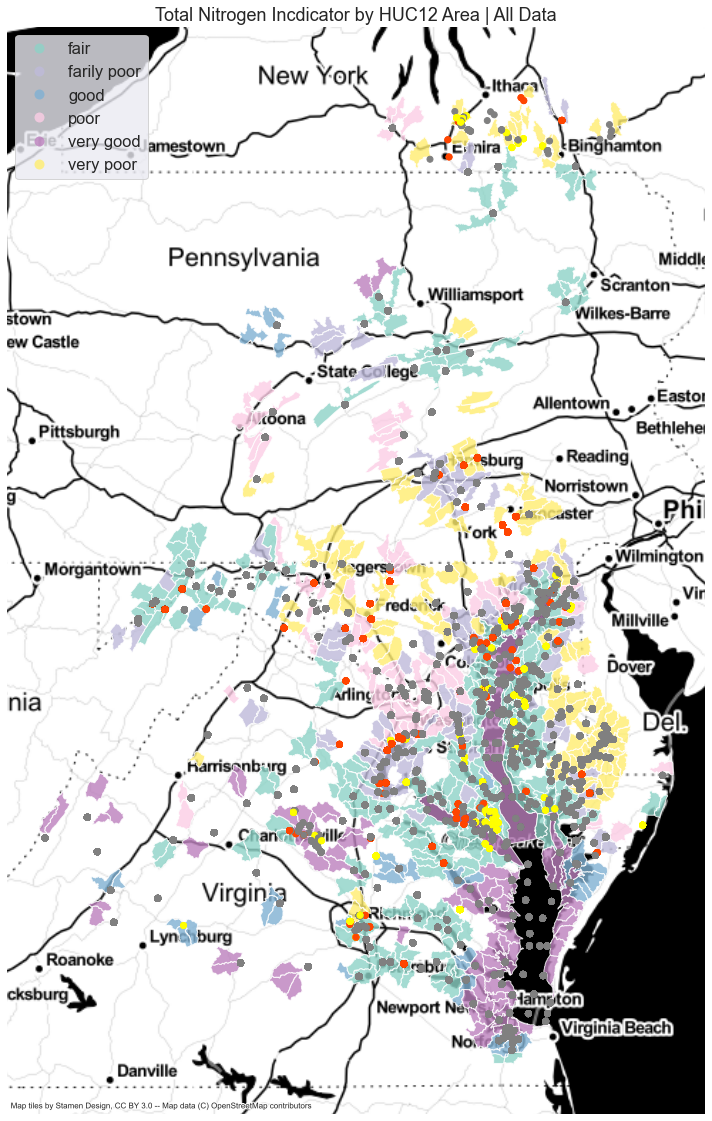

In [28]:

# plot the watershed shape file
ax = huc_locs.plot(column='indicator',figsize=(20,20), alpha=.8, cmap='Set3', legend=True)

# add a basemap from contextily
ctx.add_basemap(ax,source=ctx.providers.Stamen.Toner, zoom=7)

# project the geo dataframe to a mercator map format, then plot the sample site locations, colored by correlation
gdf.to_crs(epsg=3857).plot(ax=ax, column='correlated', cmap=ListedColormap(['orangered','yellow','grey',]))
ax.set_title("Total Nitrogen Incdicator by HUC12 Area | All Data")
ax.set_axis_off()
plt.show()

Total nitrogen plotted with sample site location air nitrogen correlations.
- Generally, the further you move away from the outflow of the bay, the worse the total nitrogen indicator score
- Many of the clusters of sample sites that have a correlation, seem to have a more poorly rated total nitrogen score
    - There are exceptions to this. An example Would be the Lower Eastern Shore - there are very vew to no sampmle sites that are correlated with air NO2, are close to the bay and yet rated very poor. It would seem more data would need to be included to better predict total nitrogen in these areas -such as non point sources, types of cropland, types of waste treatment etc.


#### The above plot was created using all the values in the data. Total nitrogen concentrations can change over time - let's limit the data to 2015 and later.

In [29]:
all_data.drop(['mean_tn'], inplace=True, axis=1)

In [30]:
gp = all_data[all_data.new_date>='2015']
gp = pd.DataFrame(gp.groupby(['huc12_'])['tn'].mean().reset_index())
gp.columns=['huc12','mean_tn']
gp['huc12']=gp.huc12.astype(str)
all_data['huc12_']=all_data.huc12_.astype(str)
all_data=pd.merge(all_data,
         gp,
        left_on='huc12_',
        right_on='huc12',
        how='left')

In [31]:
all_data['indicator'] = all_data.mean_tn.apply(indicator)

In [32]:
gdf = gpd.GeoDataFrame(all_data,
                      geometry=gpd.points_from_xy(all_data.longitude, all_data.latitude))
gdf.crs = "epsg:4326" # set the crs

all_data['huc12_']=all_data.huc12_.apply(lambda x: int(x))
all_data['huc12_']=all_data.huc12_.apply(lambda x: '0'+str(x))

huc_locs = gpd.read_file(os.path.join(PROJ_ROOT, 
                         'data',
                        'raw-data',
                         'wbdhu12_a_us_september2019.gdb'), bbox=bbox)

huc_locs=pd.merge(huc_locs, all_data[['huc12_',
                                       'indicator']].drop_duplicates(), 
                  left_on='TOHUC',
                  right_on='huc12_',
                  how='left')

huc_locs=huc_locs.to_crs(epsg=3857)

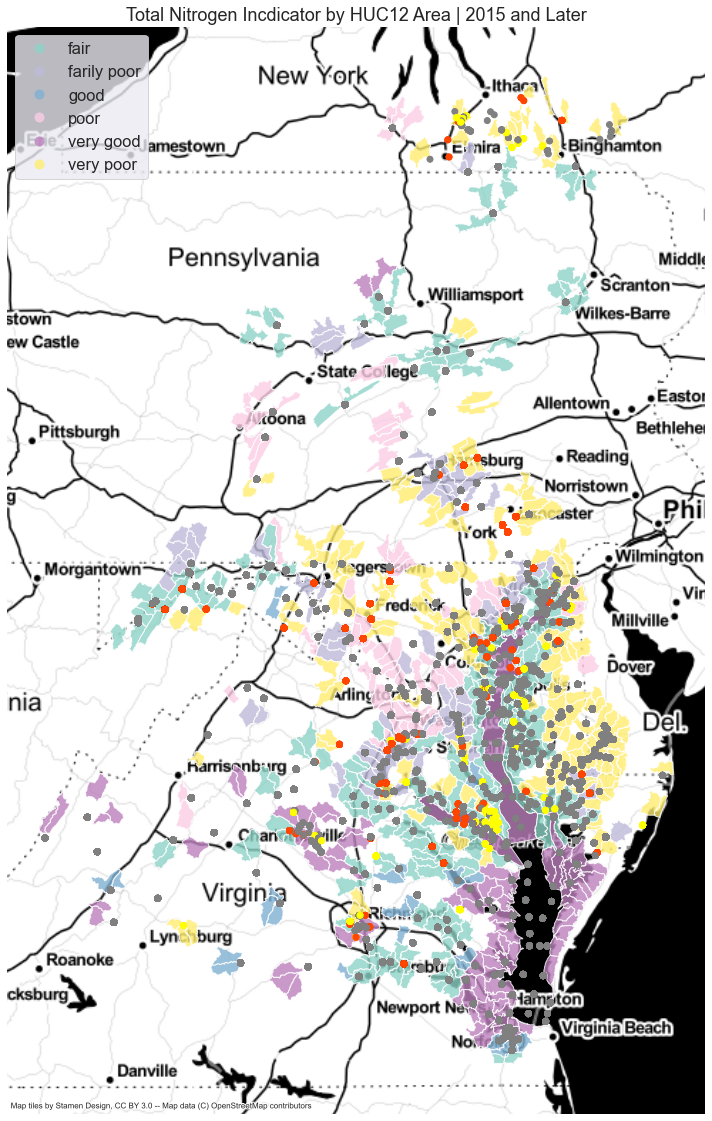

In [33]:
# plot the watershed shape file
ax = huc_locs.plot(column='indicator',figsize=(20,20), alpha=.8, cmap='Set3', legend=True)

# add a basemap from contextily
ctx.add_basemap(ax,source=ctx.providers.Stamen.Toner, zoom=7)

# project the geo dataframe to a mercator map format, then plot the sample site locations, colored by correlation
gdf.to_crs(epsg=3857).plot(ax=ax, column='correlated', cmap=ListedColormap(['orangered','yellow','grey',]))
ax.set_title("Total Nitrogen Incdicator by HUC12 Area | 2015 and Later")
ax.set_axis_off()
plt.show()

The data filtered to after 2015 looks very similar to the previous plot.

In [34]:
# drop rows
all_data.drop(['huc12_x', 'huc12_y'], axis=1, inplace=True)

### Visualize total nitrogen concentrations throughout the watershed

In [35]:
gdf = gpd.GeoDataFrame(all_data,
                      geometry=gpd.points_from_xy(all_data.longitude, all_data.latitude))
gdf.crs = "epsg:4326" # set the crs

all_data['huc12_']=all_data.huc12_.apply(lambda x: int(x))
all_data['huc12_']=all_data.huc12_.apply(lambda x: '0'+str(x))

huc_locs = gpd.read_file(os.path.join(PROJ_ROOT, 
                         'data',
                        'raw-data',
                         'wbdhu12_a_us_september2019.gdb'), bbox=bbox)
huc_locs=pd.merge(huc_locs, all_data[['huc12_',
                                       'mean_tn']].drop_duplicates(), 
                  left_on='TOHUC',
                  right_on='huc12_',
                  how='left')

huc_locs=huc_locs.to_crs(epsg=3857)

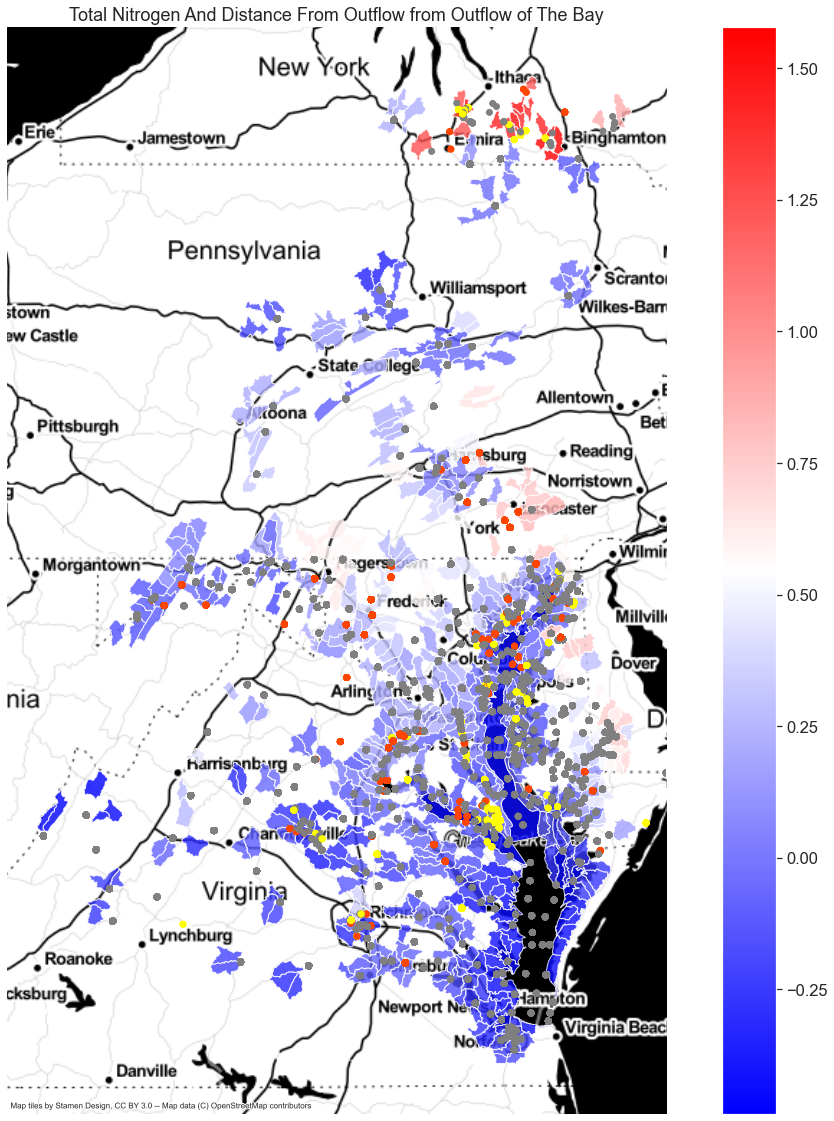

In [36]:
# transform the TN
huc_locs['mean_tn2']=np.log10(huc_locs.mean_tn)

# plot the watershed shape file
ax = huc_locs.plot(column='mean_tn2',figsize=(20,20), alpha=.8, cmap='bwr', legend=True)

# add a basemap from contextily
ctx.add_basemap(ax,source=ctx.providers.Stamen.Toner, zoom=7)

# project the geo dataframe to a mercator map format, then plot the sample site locations, colored by correlation
gdf.to_crs(epsg=3857).plot(ax=ax, column='correlated', cmap=ListedColormap(['orangered','yellow','grey',]))

#add title and plot
ax.set_title("Total Nitrogen And Distance From Outflow from Outflow of The Bay")
ax.set_axis_off()
plt.show()

The above plot follows the assumption that the further you move from the outflow of the bay, the high the concentration of total nitrogen sampled.

- The correlated sample sites match much more closely with this plot than the previous plots. TN seems to get higher where there are clusters of sample sites that are correlated with air NO2. 
    - Again, the Lower Eastern shore seems to be an exception with a fast increase in TN without any correlated sample sites. 
   - There area north of the bay near State College and Wialliamsport seem to have a slight improvement in TN  before getting worse again further north.

### How many HUC locations are in each indicator category?

In [37]:
all_data[all_data.new_date>'2015'].groupby(['huc12_','indicator'], as_index=False).tn.count().indicator.value_counts()

very poor      81
fair           77
farily poor    42
very good      33
poor           32
good           16
Name: indicator, dtype: int64

### How many samples are in each indicator category?

In [38]:

bins = pd.IntervalIndex.from_tuples([(0, .56), (.56,.65), (.65, 1),(1,1.5), (1.5,2), (2,np.inf)], closed='left')
pd.cut(all_data[all_data.new_date>'2015'].tn, bins=bins).value_counts()

[2.0, inf)      6035
[0.0, 0.56)     4770
[0.65, 1.0)     4620
[1.0, 1.5)      3874
[1.5, 2.0)      2648
[0.56, 0.65)    1546
Name: tn, dtype: int64

Disribution of the total nitrogen feature

In [39]:
all_data[all_data.new_date>'2015'].tn.describe()

count    23493.000000
mean         1.796199
std          3.085213
min          0.020000
25%          0.621000
50%          1.092000
75%          2.036000
max        122.000000
Name: tn, dtype: float64

The challenge with any machine learning model predicting on the whole watershed will be the skewness & sparsity of the data. Different HUC codes have dramatically different nitrogen level readings, ranging from .02 to 122, with a mean of 1.8. Because pollutants flow into the bay, total nitrogen sample readings will get better the closer you get toward the outflow of the bay. 

For a general model, distance from the bay will most likely be a very important indicator. Past data of the levels of TN samples taken from that site may help with prediction accuracy. 

Creating different models may help predict different areas of the watershed more accuratley. An option is to segment the data by indicator type. Another option is to segment the data on both distance from the bay and past total nitrogen within a HUC.

### Cluster HUC12 segments

Can the data be clustered using past TN, distance from the outflow of the bay, and variability of TN witin the HUC 

C:\Users\Bryan\Anaconda3\envs\hacktb\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


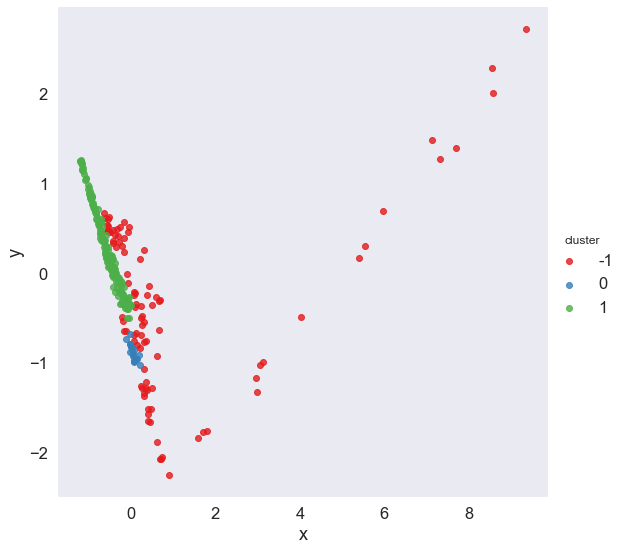

In [40]:
#create cluster column
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X_train_i=all_data[all_data.new_date>='2016'][['of_dist','huc12_','tn']]
gmeans=X_train_i[X_train_i.tn <=2].tn.mean()
X_train_i['vars']=(X_train_i['tn']-gmeans)**2

# X_train_i.drop(['tn'],inplace=True,axis=1)
# x=X_train[['huc12_','huc12_enc','of_dist']].drop_duplicates().set_index('huc12_').values
x=X_train_i.groupby(['huc12_'])[['of_dist','vars','tn']].mean().values
x = StandardScaler().fit_transform(x)


db=DBSCAN(eps=.126,
         min_samples=9,
         metric='euclidean')
labels = db.fit_predict(x)

from sklearn.decomposition import PCA


#use PCA to reduce the dimensions to 2
pca = PCA(n_components = 2)
pca.fit(x)
pca.transform(x)
transformed = pca.transform(x)

n=pd.DataFrame({'x': transformed[:, 0], 
                    'y': transformed[:,1],
                    'cluster': labels},
                   index = X_train_i.groupby(['huc12_'])[['of_dist','vars','tn']].mean().index)

_=sns.lmplot(x = 'x', y = 'y', data = n, fit_reg= False, hue = 'cluster', palette = 'Set1', size = 8)

# n['cluster']=n.cluster.map({-1:1}).fillna(0)

X_train_i=all_data.merge(n[['cluster']], left_on='huc12_', right_index=True, how='left')
X_test_i=all_data.merge(n[['cluster']], left_on='huc12_', right_index=True, how='left').fillna(0)

In [41]:

huc_locs = gpd.read_file(os.path.join(PROJ_ROOT, 
                         'data',
                        'raw-data',
                         'wbdhu12_a_us_september2019.gdb'), bbox=bbox)

In [42]:
X_train_i['huc12s']=X_train_i.huc12_.apply(lambda x: int(x))
X_train_i['huc12s']=X_train_i.huc12s.apply(lambda x: '0'+str(x))

In [43]:
bbox=(-80.44707800, 36.73004000, -74.83524400, 42.80672000)
huc_locs = gpd.read_file(os.path.join(PROJ_ROOT, 
                         'data',
                        'raw-data',
                         'wbdhu12_a_us_september2019.gdb'), bbox=bbox)
huc_locs=pd.merge(huc_locs, X_train_i[['huc12s',
                                       'cluster']].drop_duplicates(), 
                  left_on='TOHUC',
                  right_on='huc12s',
                  how='left')

huc_locs=huc_locs.to_crs(epsg=3857)

In [44]:
# create a geodataframe from the new merged data
gdf = gpd.GeoDataFrame(X_train_i,
                      geometry=gpd.points_from_xy(X_train_i.longitude, X_train_i.latitude))
gdf.crs = "epsg:4326" # set the crs

In [45]:
gdf.head(2)

,Unnamed: 0,new_date,latitude,longitude,sampledepth,huc12_,hucname_,areaacres,za_mean,lc_0,...,date_local,arithmetic_mean,first_max_value,correlated,geometry,day,indicator,mean_tn,cluster,huc12s
0,0,2019-03-24 12:28:00,38.6336,-75.6177,0.5,020801090405,Butler Mill Branch-Nanticoke River,27423.32,67.259003,0.0,...,2019-03-24,16.091667,38.2,not correlated,POINT (-75.61770 38.63360),24,very poor,3.151386,-1.0,020801090405
1,1,2019-03-24 12:46:00,38.6422,-75.6068,0.3,020801090404,Clear Brook-Turkey Branch,24031.76,67.646972,0.0,...,2019-03-24,16.091667,38.2,not correlated,POINT (-75.60680 38.64220),24,very poor,5.446432,-1.0,020801090404


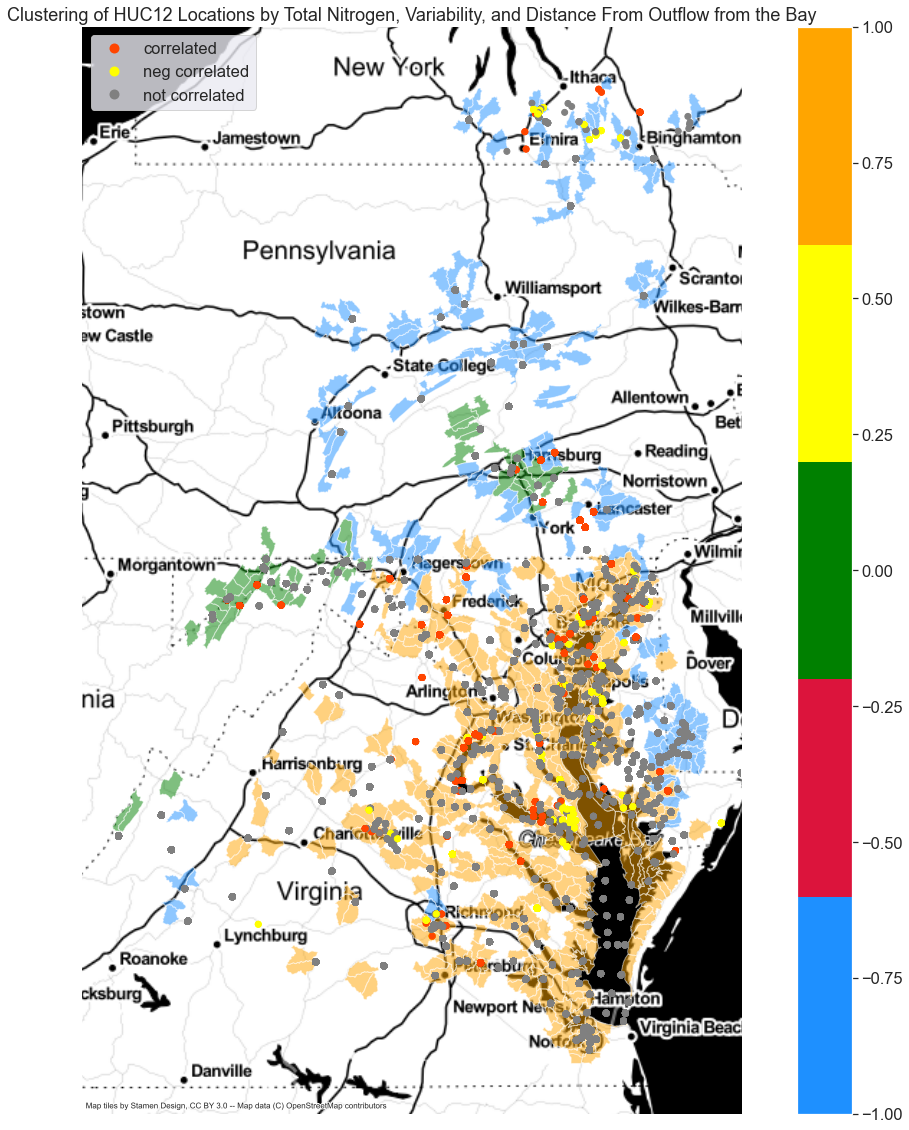

In [46]:

# plot the watershed shape file
ax = huc_locs.plot(column='cluster',figsize=(20,20), alpha=.5, cmap=ListedColormap(['dodgerblue','crimson','green','yellow','orange']), legend=True)
# add a basemap from contextily
ctx.add_basemap(ax,source=ctx.providers.Stamen.Toner, zoom=7)
# project the geo dataframe to a mercator map format, then plot the sample site locations, colored by correlation
# gdf.to_crs(epsg=3857).plot(ax=ax, column='cluster', cmap=ListedColormap(['dodgerblue','crimson',]),legend=True)
gdf.to_crs(epsg=3857).plot(ax=ax, column='correlated', cmap=ListedColormap(['orangered','yellow','grey',]),legend=True)
ax.set_title("Clustering of HUC12 Locations by Total Nitrogen, Variability, and Distance From Outflow from the Bay")
ax.set_axis_off()
plt.show()

The above cluster visualization looks similar to the earlier plot segmented by TN. It captures the 'poor' indicators locatd on the Lower Easter Shore, the fair to very poor HUC locations alot further north of the bay, and further east of the bay.  It doesn't however capture the poor/very poor areas along the north part of the bay near Balitmore and Washington DC, nor does it capture the 'fair' from 'very good' along the Potomac and Rappahannock rivers.